##Importing Libraries 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Reading Dataset

In [ ]:

df= pd.read_csv('/content/drive/MyDrive/ISEAR.csv', names=['SN', 'Class','Sentences'], index_col='SN')

df.head(5)

,Class,Sentences
SN,,
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


In [ ]:
df = df[['Sentences','Class']]
df.head(10)

,Sentences,Class
SN,,
0,On days when I feel close to my partner and ot...,joy
1,Every time I imagine that someone I love or I ...,fear
2,When I had been obviously unjustly treated and...,anger
3,When I think about the short time that we live...,sadness
4,At a gathering I found myself involuntarily si...,disgust
5,When I realized that I was directing the feeli...,shame
6,I feel guilty when when I realize that I consi...,guilt
7,After my girlfriend had taken her exam we went...,joy
8,"When, for the first time I realized the meanin...",fear


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(df.Class)

In [ ]:
from keras. utils import to_categorical
import numpy as np

y = to_categorical(np.asarray(y))

## 3. Data Preprocessing

Now, since or input `Sentences` is a text input to the model. But, models do not understand texts. We have to convert these texts into sequences of numbers by the implementation of various pre-processing steps like tokenizations. In the following block, we will be following a preprocessing step and create input sequences so as to feed on a LSTM neural network.

In [ ]:
sentences = df.Sentences.values

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

encoded_docs = tokenizer.texts_to_sequences(sentences)

print(encoded_docs)

[[19, 181, 8, 1, 105, 91, 5, 4, 744, 6, 83, 52, 8, 1, 105, 18, 2711, 15, 131, 6, 206, 630, 2, 91, 689, 15, 61, 159, 1, 2296, 1783], [399, 35, 1, 2297, 13, 86, 1, 163, 102, 1, 71, 689, 2, 667, 543, 201, 188], [8, 1, 11, 44, 1296, 715, 400, 6, 11, 113, 965, 9, 4691, 31], [8, 1, 299, 29, 3, 503, 35, 13, 27, 345, 6, 3379, 17, 5, 3, 4692, 9, 4, 189, 8, 1, 299, 13, 1, 37, 16, 530, 31, 503, 35], [18, 2, 2298, 1, 87, 131, 3380, 303, 228, 5, 123, 61, 40, 1218, 1472, 13, 1, 716, 21, 617, 6, 4693], [8, 1, 204, 13, 1, 7, 4694, 3, 304, 9, 2712, 15, 131, 18, 4, 744, 6, 31, 128, 7, 361, 5, 235, 3, 811, 19, 41, 448, 9, 4695, 38, 4, 249, 4696], [1, 105, 120, 8, 8, 1, 1067, 13, 1, 2713, 1784, 147, 184, 290, 223, 3381, 14, 4, 449, 1, 105, 21, 690, 3382], [32, 4, 121, 11, 315, 26, 132, 27, 62, 5, 26, 1382, 155], [8, 14, 3, 67, 35, 1, 204, 3, 1785, 9, 188], [8, 2, 81, 65, 3383, 101, 6, 1, 114, 504, 5, 844, 176, 3, 269], [8, 1, 458, 95, 29, 3, 362, 111, 17, 2714, 5, 258, 6, 197, 28, 1596, 5, 618, 84, 439, 8

In [ ]:
def max_len_seq(sequences):
    maxseq = 0 
    for item in sequences:
        if len(item)>maxseq:
            maxseq = len(item)
    return maxseq

MAX_LEN_SEQ = max_len_seq(encoded_docs)
print(MAX_LEN_SEQ)

padded_sequence = pad_sequences(encoded_docs, maxlen=MAX_LEN_SEQ)

vocab_size = len(tokenizer.word_index) + 1 ## plus 1 is because it contains padded element 0 

178


In [ ]:
print(tokenizer.word_index)

{'i': 1, 'a': 2, 'the': 3, 'my': 4, 'to': 5, 'and': 6, 'was': 7, 'when': 8, 'of': 9, 'in': 10, 'had': 11, 'me': 12, 'that': 13, 'for': 14, 'with': 15, 'not': 16, 'it': 17, 'at': 18, 'on': 19, 'he': 20, 'very': 21, 'friend': 22, 'felt': 23, 'an': 24, 'she': 25, 'her': 26, 'we': 27, 'one': 28, 'about': 29, 'as': 30, 'this': 31, 'after': 32, 'from': 33, 'by': 34, 'time': 35, 'were': 36, 'did': 37, 'out': 38, 'but': 39, 'who': 40, 'him': 41, 'because': 42, 'his': 43, 'been': 44, 'got': 45, 'have': 46, 'which': 47, 'some': 48, 'home': 49, 'mother': 50, 'up': 51, 'friends': 52, 'told': 53, 'would': 54, 'so': 55, 'day': 56, 'they': 57, 'do': 58, 'school': 59, 'be': 60, 'people': 61, 'went': 62, 'there': 63, 'saw': 64, 'is': 65, 'person': 66, 'first': 67, 'our': 68, 'father': 69, 'came': 70, 'could': 71, 'all': 72, 'mine': 73, 'night': 74, 'go': 75, 'made': 76, "didn't": 77, 'girl': 78, 'having': 79, 'back': 80, 'car': 81, 'being': 82, 'other': 83, 'something': 84, 'boyfriend': 85, 'someone': 

In [ ]:
print(f"Padded Sequence: {padded_sequence[0]}")
print(f"Maximum Length of Padded Sequence: {len(padded_sequence[0])}")

Padded Sequence: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0   19  181    8    1  105   91    5
    4  744    6   83   52    8    1  105   18 2711   15  131    6  206
  630    2   91  689   15   61  159    1 2296 1783]
Maximum Length of Padded Sequence: 178


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded_sequence, y, test_size =0.2, random_state = 40)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5956, 178)
(5956, 7)
(1490, 178)
(1490, 7)


## 4. Model Building

In [ ]:
# defining the embedding vector length as shape to the LSTM model
embedding_vector_length = 54

model = Sequential()

# The embedding layer is used to create the word vectors and such word vectors
model.add(Embedding(vocab_size, embedding_vector_length, input_length=MAX_LEN_SEQ) )

# We have a long sequence lengths, so the model might get pretty dense
# when the model becomes heavy and complex, model might overfit.
# so, we are adding a dropout layer as follows to avoid overfitting and boost training rate
# Here, 1D spatial dropout drops the entire 1D feature maps instead of individual elements
# like the regular dropout
model.add(SpatialDropout1D(0.25))

# Finally, we come to the backbone or the most important layer of the model
# Let's add a LSTM model with 50 units with dropout rate of 0.5 and recurrent dropout of 0.5
model.add(LSTM(35, dropout=0.5, recurrent_dropout=0.5))

# Also, to avoid the overfitting, we add a regular dropout layer with dropout rate of 0.2 as
model.add(Dropout(0.2))

# Now, we use a dense layer at the end of the LSTM network with one unit in the ouput layer
# The one unit gives the value. This value is interpreted by the loss function and
# we obtain a value as a result of the model. HeremDense layer with output units of 7 class
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['acc'])  

print(model.summary()) 

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 178, 54)           489564    
_________________________________________________________________
spatial_dropout1d_6 (Spatial (None, 178, 54)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 35)                12600     
_________________________________________________________________
dropout_6 (Dropout)          (None, 35)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 252       
Total params: 502,416
Trainable params: 502,416
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
output_dir = "/content/drive/MyDrive/Output_Folder/"
model_name = "RNN"

In [ ]:
from keras.callbacks import ModelCheckpoint
import os

history = model.fit(X_train, y_train, epochs = 25, batch_size=32, verbose=True, validation_data=(X_test, y_test),
                    callbacks=[ModelCheckpoint(os.path.join(output_dir, "{model_name}").format(model_name=model_name) + "-{epoch:02d}-{val_acc:.2f}.hdf5", save_best_only=True, verbose=True),
                                            ] if model_name is not None else [])

Epoch 1/25
187/187 [==============================] - 39s 194ms/step - loss: 1.9393 - acc: 0.1582 - val_loss: 1.8582 - val_acc: 0.2658

Epoch 00001: val_loss improved from inf to 1.85821, saving model to /content/drive/MyDrive/Output_Folder/RNN-01-0.27.hdf5
Epoch 2/25
187/187 [==============================] - 36s 192ms/step - loss: 1.7641 - acc: 0.3147 - val_loss: 1.5902 - val_acc: 0.3919

Epoch 00002: val_loss improved from 1.85821 to 1.59023, saving model to /content/drive/MyDrive/Output_Folder/RNN-02-0.39.hdf5
Epoch 3/25
187/187 [==============================] - 36s 192ms/step - loss: 1.4735 - acc: 0.4330 - val_loss: 1.4368 - val_acc: 0.4577

Epoch 00003: val_loss improved from 1.59023 to 1.43681, saving model to /content/drive/MyDrive/Output_Folder/RNN-03-0.46.hdf5
Epoch 4/25
187/187 [==============================] - 36s 191ms/step - loss: 1.2257 - acc: 0.5467 - val_loss: 1.3384 - val_acc: 0.5121

Epoch 00004: val_loss improved from 1.43681 to 1.33843, saving model to /content/d

In [ ]:
model.save_weights("/content/drive/MyDrive/Output_Folder/LSTM_weights.h5", overwrite= True)

In [ ]:
model.save('/content/drive/MyDrive/Output_Folder/models/RNN_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Output_Folder/models/RNN_model/assets


## 5. Plotting

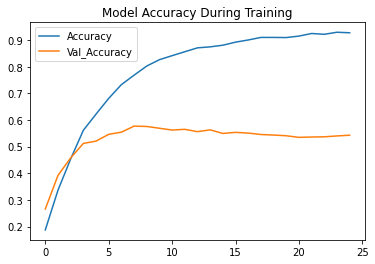

In [ ]:
plt.title("Model Accuracy During Training")
plt.plot(history.history['acc'], label='Accuracy')
plt.plot(history.history['val_acc'], label='Val_Accuracy')
plt.legend()
plt.show()

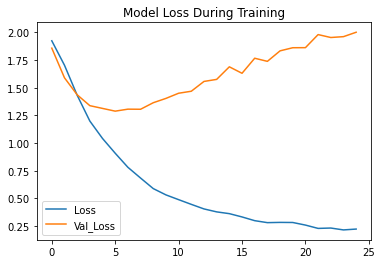

In [ ]:
plt.title("Model Loss During Training")
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.legend()
plt.show()

## 6. Model Predictions

In [ ]:
def predict_sentiment(inpText):
  inputText = inpText
  tokenizedSeq = tokenizer.texts_to_sequences([inputText])
  padSeq = pad_sequences(tokenizedSeq,maxlen=len(tokenizedSeq[0]))
  sentiment_value = np.argmax(model.predict(padSeq))
  sentiment = le.inverse_transform([sentiment_value])
  return sentiment

In [ ]:
inpText = input()
print(f"Predicted Label: {predict_sentiment(inpText)}")

It was my fault
Predicted Label: ['guilt']
